# Exercise set 3

In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from matplotlib import cm 

### Ex 1

In [3]:
### a
def fdm2d(n: int, a_x = -1.0, a_y = -1.0, b_x = 0.0, b_y = 0.0, c = 0.0) -> (sparse.csc_matrix, np.array): 
    h = 1.0/(n+1)
    Dx = sparse.diags([a_x - h*b_x/2, -2*a_x+h*h*c/2.0, a_x + h*b_x/2], offsets=[-1, 0, 1], shape=(n,n))
    Dy = sparse.diags([a_y - h*b_y/2, -2*a_y+h*h*c/2.0, a_y + h*b_y/2], offsets=[-1, 0, 1], shape=(n,n))
    Id = sparse.eye(n,n); 
    A = sparse.kron(Id, Dx) + sparse.kron(Dy, Id)
    [X, Y] = np.meshgrid(np.arange(1, n+1) * h, np.arange(1, n+1) * h) 
    b = h**2 * np.reshape(X - Y, (n**2, 1))
    return A, b

A,b=fdm2d(5,-1.0,-1.0,3.0,-4.0,1.0); print(type(A)) # -> <class ’scipy.sparse.bsr.bsr_matrix’> 

print(f"A: {A.toarray()}")
print(f"b: {b}")

<class 'scipy.sparse.bsr.bsr_matrix'>
A: [[ 4.02777778 -0.75        0.          0.          0.         -1.33333333
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-1.25        4.02777778 -0.75        0.          0.          0.
  -1.33333333  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.         -1.25        4.02777778 -0.75        0.          0.
   0.         -1.33333333  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.         -1.25        4.02777778 -0.75        0.
   0.          0.         -1.33333333  0.       

In [4]:
### b
n_list = [32, 128]

for n in n_list:
    print(f"n={n}:")
    A, b = fdm2d(n,-1.0,-1.0,3.0,-4.0,1.0);
    u = spsolve(A,b); 
    print(u)
    print(A*u-b) # -> zero value row vector (modulo round-off) 
    print(np.linalg.norm(A*u-b,2))
    print("----")
    break


n=32:
[-7.44376872e-05 -1.27534162e-04 -1.58497569e-04 ... -2.14345951e-04
 -1.25973818e-04 -5.32917912e-05]
[[-5.42101086e-20  2.78264741e-05  5.56529482e-05 ... -5.56529482e-05
  -2.78264741e-05  0.00000000e+00]
 [-2.78264741e-05 -4.74338450e-20  2.78264741e-05 ... -8.34794223e-05
  -5.56529482e-05 -2.78264741e-05]
 [-5.56529482e-05 -2.78264741e-05 -4.06575815e-20 ... -1.11305896e-04
  -8.34794223e-05 -5.56529482e-05]
 ...
 [ 5.56529482e-05  8.34794223e-05  1.11305896e-04 ...  2.03287907e-20
   2.78264741e-05  5.56529482e-05]
 [ 2.78264741e-05  5.56529482e-05  8.34794223e-05 ... -2.78264741e-05
  -2.37169225e-20  2.78264741e-05]
 [-5.42101086e-20  2.78264741e-05  5.56529482e-05 ... -5.56529482e-05
  -2.78264741e-05  0.00000000e+00]]
0.37206629417517906
----


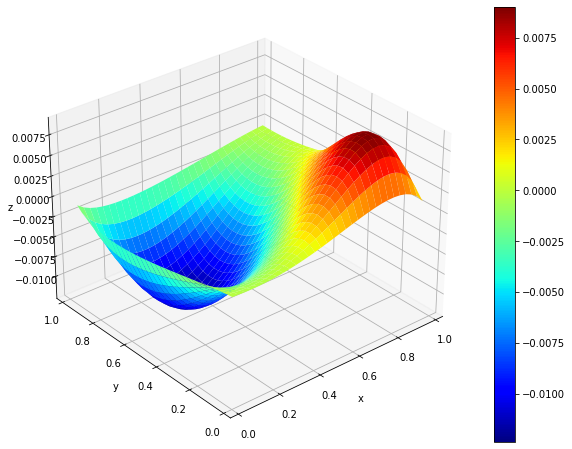

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

h = 1.0/(n+1)
[X, Y] = np.meshgrid(np.arange(1, n+1) * h, np.arange(1, n+1) * h) 

surf = ax.plot_surface(X, Y, np.reshape(u, (n, n)), cmap=cm.jet)

fig.colorbar(surf)
ax.azim = 230 # Change the camera angle so it is the same as in the matlab example
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");